In [1]:
# Load required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("survey_results_public.csv", low_memory = False)
schema = pd.read_csv("survey_results_schema.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
schema.shape

(85, 2)

Text(0.5, 1.0, 'Programming Languages')

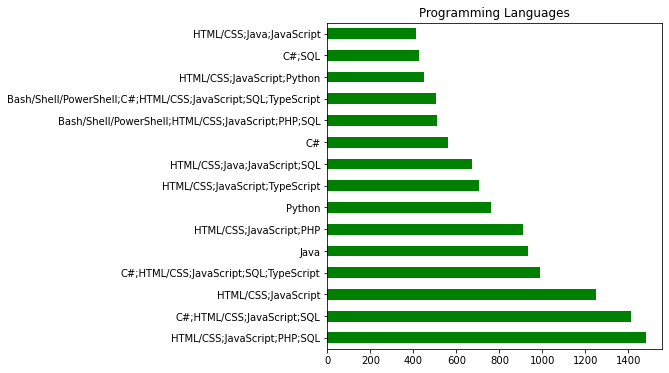

In [31]:
count_values = df.LanguageWorkedWith.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

count_values[:15].plot(kind="barh" , color = "g" , figsize = (6,6))

plt.title("Programming Languages")


In [25]:
print(count_values)

HTML/CSS;JavaScript;PHP;SQL                                                          1483
C#;HTML/CSS;JavaScript;SQL                                                           1414
HTML/CSS;JavaScript                                                                  1247
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                 990
Java                                                                                  934
                                                                                     ... 
Go;Java;JavaScript;Scala                                                                1
Assembly;Bash/Shell/PowerShell;C;C++;C#;HTML/CSS;Java;JavaScript;Python;SQL;Swift       1
C;C++;Dart;HTML/CSS;Java;JavaScript;PHP                                                 1
Bash/Shell/PowerShell;Clojure;HTML/CSS;Java;JavaScript;Python;Scala;SQL;Other(s):       1
Assembly;Bash/Shell/PowerShell;C;Objective-C;Python;Rust;Other(s):                      1
Name: Lang

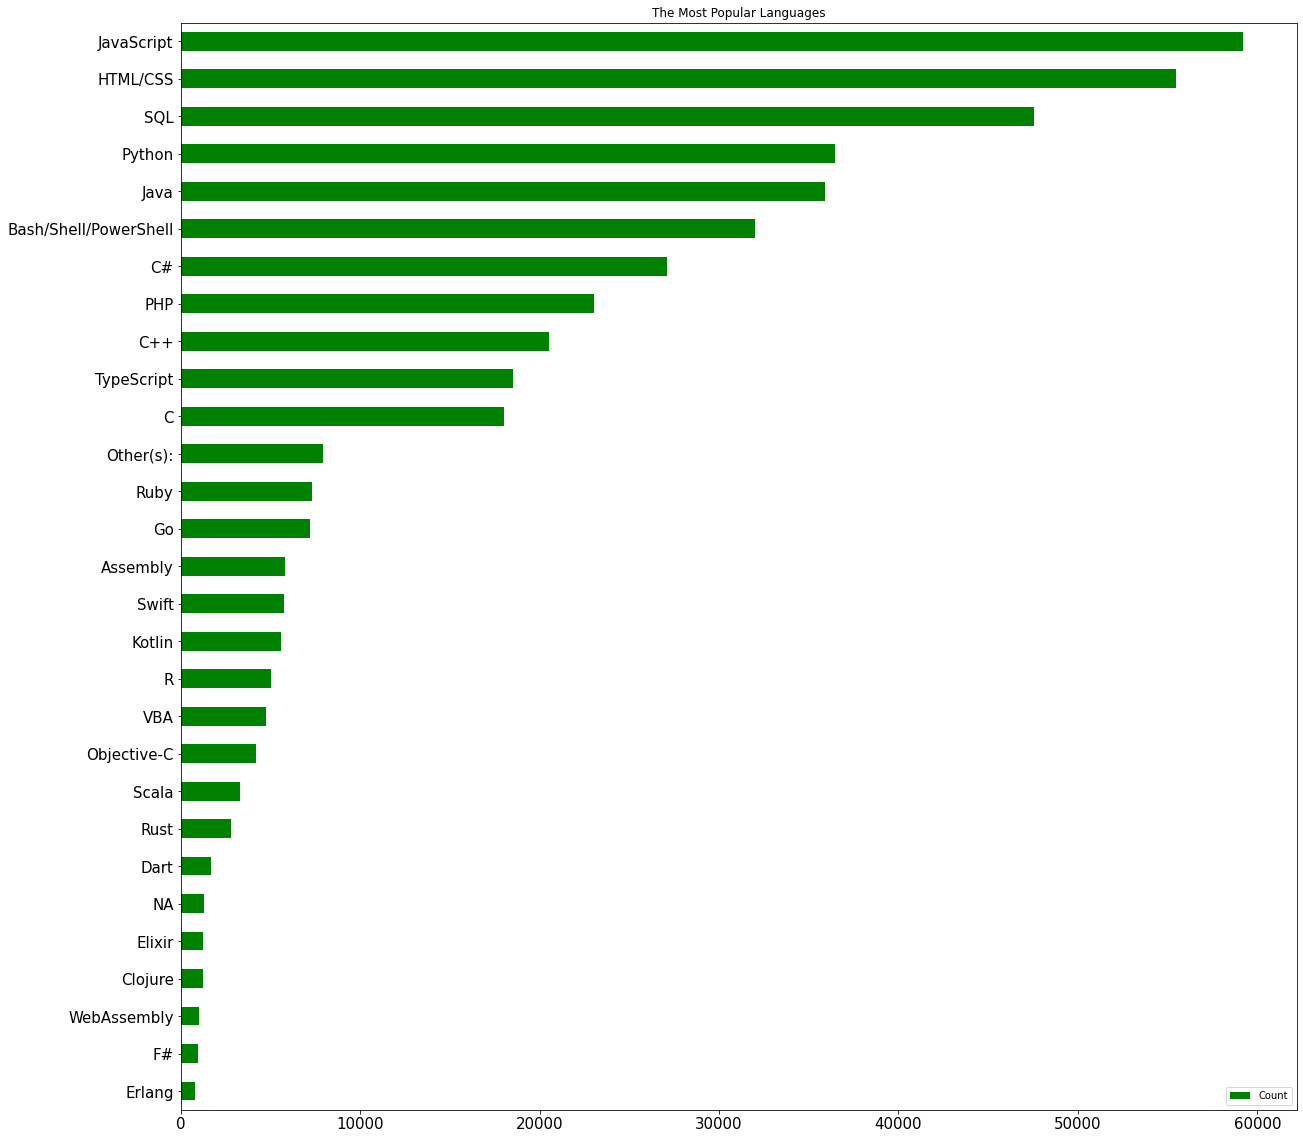

In [38]:
import csv
from collections import defaultdict, Counter

with open("survey_results_public.csv" , encoding="utf-8") as f:
    csv_reader = csv.DictReader(f)
    
    language_counts = Counter()
    for line in csv_reader:
        
        languagesss = line["LanguageWorkedWith"].split(";")
        
        #language_counts.update(languagesss)
        for language in languagesss:
            language_counts[language] += 1
            

def plot(unique_dict, plot_title):
    
    #print(type(unique_dim_dict)) #<class 'collections.Counter'>  ddictionary INPUT - unique_dim_dict as a- dictionary 
    
    dfr = pd.DataFrame.from_dict(unique_dict, orient='index', dtype=None) # Creat dataframe
    dfr.columns = ['Count']
    dfr.sort_values('Count',ascending=True,inplace=True)
    #print(type(dim_count))
    #print(dim_count)
    dfr.plot(kind = 'barh', figsize = (20,20), fontsize = 15, title = plot_title , color = "g")
    
    
plot(language_counts,'The Most Popular Languages')

Counter({'Developer, full-stack': 42222, 'Developer, back-end': 40665, 'Developer, front-end': 26649, 'Developer, desktop or enterprise applications': 17316, 'Developer, mobile': 14698, 'Student': 11921, 'Database administrator': 9520, 'Designer': 9182, 'System administrator': 8929, 'DevOps specialist': 8862, 'NA': 7548, 'Developer, embedded applications or devices': 7248, 'Data scientist or machine learning specialist': 6460, 'Developer, QA or test': 6359, 'Data or business analyst': 6294, 'Academic researcher': 5930, 'Engineer, data': 5819, 'Educator': 4492, 'Developer, game or graphics': 4439, 'Engineering manager': 4202, 'Product manager': 4032, 'Scientist': 3617, 'Engineer, site reliability': 2951, 'Senior executive/VP': 2107, 'Marketing or sales professional': 975})


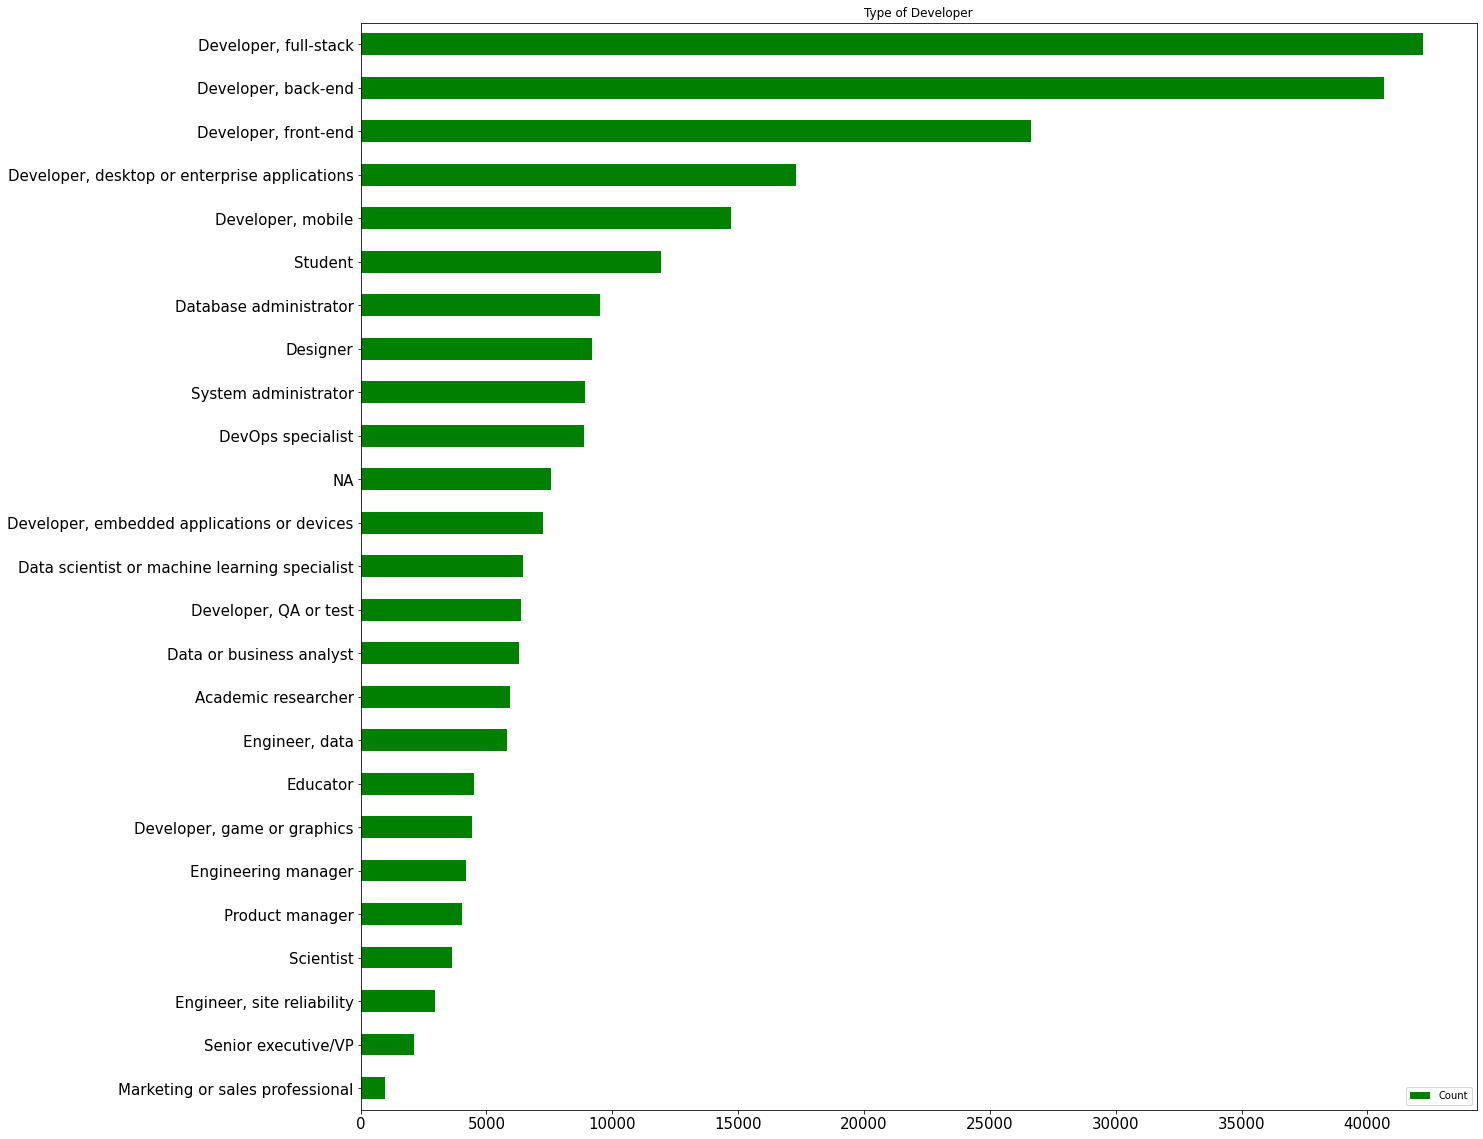

In [49]:
# most popular language based on dveloper type
import csv
from collections import defaultdict, Counter

import csv
from collections import defaultdict, Counter

with open("survey_results_public.csv" , encoding="utf-8") as f:
    csv_reader = csv.DictReader(f)
    
    unique_developers_counts = Counter()

    for line in csv_reader:
        
        languagesss = line["DevType"].split(";")
        #language_counts.update(languagesss)
        for language in languagesss:
            unique_developers_counts[language] += 1
            
print(unique_developers_counts)


def plot(unique_dict, plot_title):
    
    #print(type(unique_dim_dict)) #<class 'collections.Counter'>  ddictionary INPUT - unique_dict as a- dictionary 
    
    dfr = pd.DataFrame.from_dict(unique_dict, orient='index', dtype=None) # Creat dataframe
    dfr.columns = ['Count']
    dfr.sort_values('Count',ascending=True,inplace=True)
    #print(type(dim_count))
    #print(dim_count)
    dfr.plot(kind = 'barh', figsize = (20,20), fontsize = 15, title = plot_title , color = "g")
    
    
plot(unique_developers_counts,'Type of Developer')

# Note : Here i avoid to avoiding NA values


<h3>For each 'Data scientist or machine learning specialist' developer, programming language counts
<h3>

In [104]:
import csv
from collections import defaultdict, Counter

with open("survey_results_public.csv" , encoding="utf-8") as f:
    csv_reader = csv.DictReader(f)

    dev_type_info = {}

    for line in csv_reader:
        dev_types = line['DevType'].split(';')

        for dev_type in dev_types:
            dev_type_info.setdefault(dev_type, {
                'total': 0,
                'language_counter': Counter()
            })

            languages = line['LanguageWorkedWith'].split(';')
            dev_type_info[dev_type]['language_counter'].update(languages)
            dev_type_info[dev_type]['total'] += 1

            
developer_language_count = pd.DataFrame.from_dict(dev_type_info, orient='index', dtype=None).T
developer_language_count.head(10)

,NA,"Developer, desktop or enterprise applications","Developer, front-end",Designer,"Developer, back-end","Developer, full-stack",Academic researcher,"Developer, mobile",Data or business analyst,Data scientist or machine learning specialist,...,"Developer, game or graphics",Educator,Student,Engineering manager,Senior executive/VP,System administrator,"Developer, embedded applications or devices",Product manager,Scientist,Marketing or sales professional
total,7548,17316,26649,9182,40665,42222,5930,14698,6294,6460,...,4439,4492,11921,4202,2107,8929,7248,4032,3617,975
language_counter,"{'HTML/CSS': 4144, 'Java': 3224, 'JavaScript':...","{'C++': 5600, 'HTML/CSS': 11178, 'Python': 627...","{'C++': 5158, 'HTML/CSS': 22285, 'Python': 844...","{'HTML/CSS': 7243, 'JavaScript': 7192, 'Bash/S...","{'HTML/CSS': 26605, 'Bash/Shell/PowerShell': 1...","{'HTML/CSS': 33329, 'C': 6694, 'C++': 7700, 'C...","{'C++': 2364, 'HTML/CSS': 3313, 'Java': 2506, ...","{'C++': 3711, 'HTML/CSS': 9181, 'Java': 8409, ...","{'Java': 2138, 'R': 1327, 'SQL': 4650, 'C#': 2...","{'Java': 2453, 'R': 1975, 'SQL': 3775, 'C#': 1...",...,"{'C#': 2411, 'Go': 384, 'JavaScript': 3064, 'P...","{'C#': 1357, 'Go': 341, 'JavaScript': 3151, 'P...","{'Bash/Shell/PowerShell': 4050, 'HTML/CSS': 81...","{'Bash/Shell/PowerShell': 2063, 'HTML/CSS': 27...","{'Bash/Shell/PowerShell': 986, 'HTML/CSS': 151...","{'Bash/Shell/PowerShell': 5218, 'HTML/CSS': 64...","{'Bash/Shell/PowerShell': 3432, 'C#': 2859, 'H...","{'Bash/Shell/PowerShell': 1571, 'C++': 894, 'C...","{'C++': 1496, 'Python': 2513, 'R': 934, 'Bash/...","{'Bash/Shell/PowerShell': 313, 'C++': 190, 'Go..."


In [105]:
variable = (developer_language_count.iloc[1][9])
variable

Counter({'Java': 2453,
         'R': 1975,
         'SQL': 3775,
         'C#': 1463,
         'Go': 563,
         'JavaScript': 3319,
         'Python': 5125,
         'Bash/Shell/PowerShell': 2874,
         'HTML/CSS': 3258,
         'C++': 2066,
         'Kotlin': 304,
         'PHP': 1198,
         'Ruby': 426,
         'TypeScript': 856,
         'VBA': 490,
         'Clojure': 140,
         'C': 1674,
         'Assembly': 565,
         'Scala': 611,
         'Objective-C': 254,
         'Rust': 237,
         'Swift': 327,
         'F#': 100,
         'Other(s):': 682,
         'Erlang': 95,
         'Dart': 119,
         'WebAssembly': 121,
         'NA': 67,
         'Elixir': 108})

In [106]:
ML_and_DS = pd.DataFrame.from_dict(variable, orient='index').reset_index()
ML_and_DS

,index,0
0,Java,2453
1,R,1975
2,SQL,3775
3,C#,1463
4,Go,563
5,JavaScript,3319
6,Python,5125
7,Bash/Shell/PowerShell,2874
8,HTML/CSS,3258
9,C++,2066


In [107]:
ML_and_DS = ML_and_DS.rename(columns={'index':'Language', 0:'Count'})
ML_and_DS

,Language,Count
0,Java,2453
1,R,1975
2,SQL,3775
3,C#,1463
4,Go,563
5,JavaScript,3319
6,Python,5125
7,Bash/Shell/PowerShell,2874
8,HTML/CSS,3258
9,C++,2066


In [108]:
type(ML_and_DS)

pandas.core.frame.DataFrame

In [109]:
ML_and_DS.sort_values('Count',ascending=True,inplace=True)

In [110]:
ML_and_DS = ML_and_DS.set_index('Language')
ML_and_DS

,Count
Language,
NA,67
Erlang,95
F#,100
Elixir,108
Dart,119
WebAssembly,121
Clojure,140
Rust,237
Objective-C,254


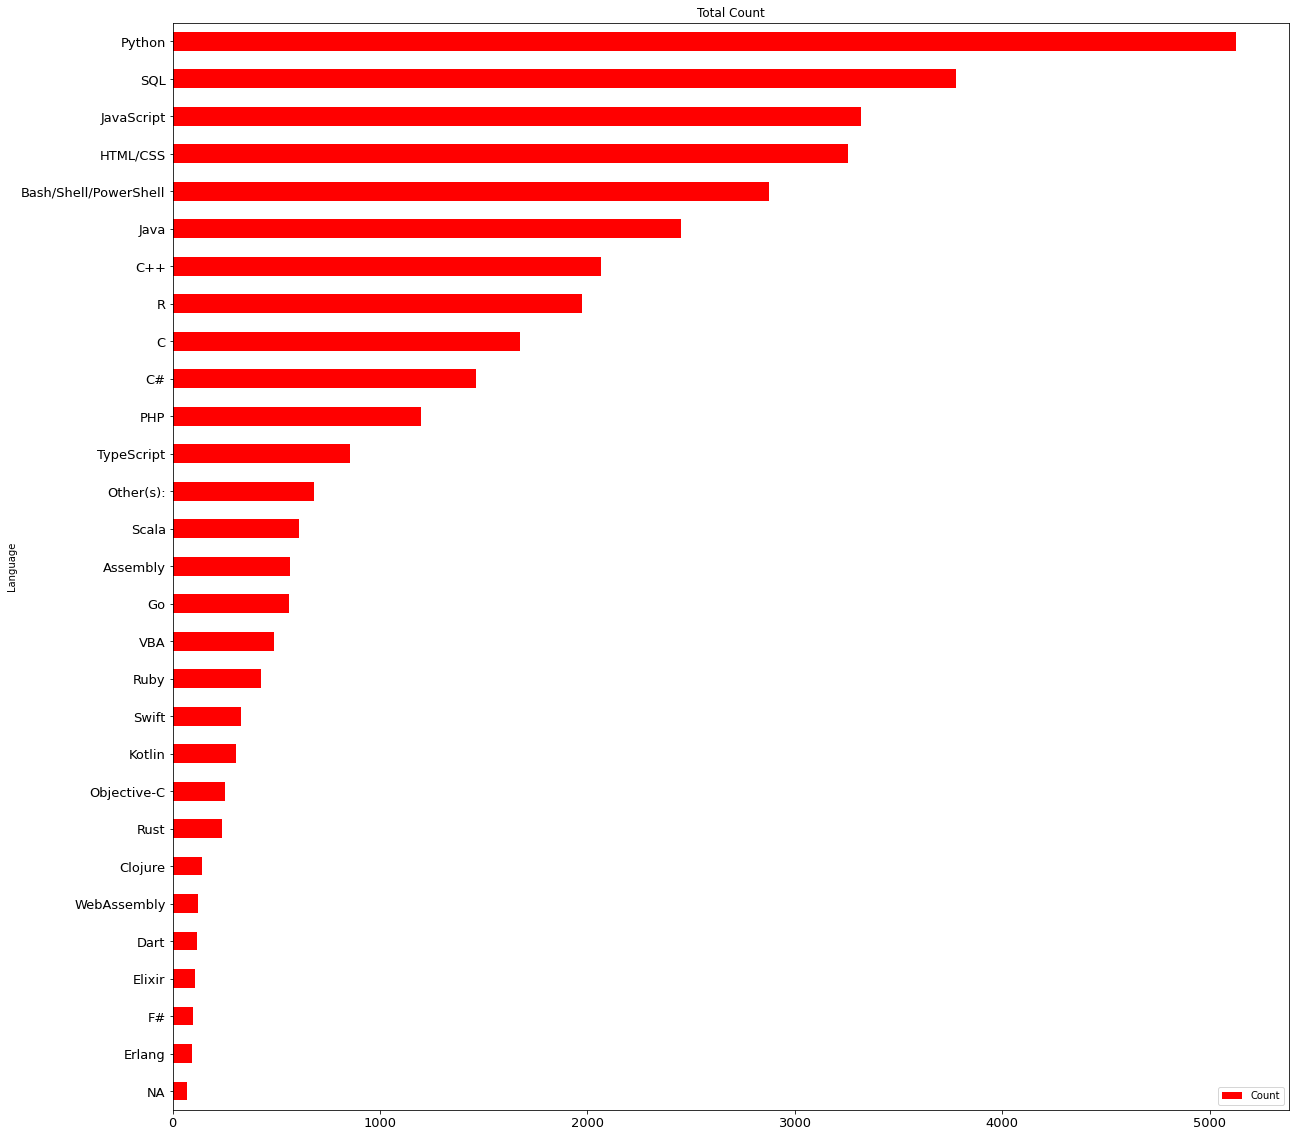

In [111]:
ML_and_DS.plot(kind = 'barh', figsize = (20,20), fontsize = 13, title = 'Total Count' , color = "r")

In [94]:
import csv
from collections import defaultdict, Counter

import csv
from collections import defaultdict, Counter

with open("survey_results_public.csv" , encoding="utf-8") as f:
    csv_reader = csv.DictReader(f)
    
    unique_framework_counts = Counter()
    for line in csv_reader:
        frameworkset = line["WebFrameWorkedWith"].split(";")
        
        for framework in frameworkset:
            unique_framework_counts[framework] += 1

print(unique_framework_counts)


Counter({'jQuery': 30981, 'NA': 23861, 'React.js': 19877, 'Angular/Angular.js': 19532, 'ASP.NET': 16699, 'Express': 12522, 'Spring': 10298, 'Vue.js': 9671, 'Django': 8249, 'Flask': 7694, 'Laravel': 6679, 'Other(s):': 5257, 'Ruby on Rails': 5225, 'Drupal': 2195})


In [99]:
framework_count = pd.DataFrame.from_dict(unique_framework_counts, orient='index', dtype=None).reset_index()
framework_count = framework_count.rename(columns={'index':'FrameWork', 0:'Count'})
framework_count.sort_values('Count',ascending=True,inplace=True)
framework_count = framework_count.set_index('FrameWork')

framework_count

,Count
FrameWork,
Drupal,2195
Ruby on Rails,5225
Other(s):,5257
Laravel,6679
Flask,7694
Django,8249
Vue.js,9671
Spring,10298
Express,12522


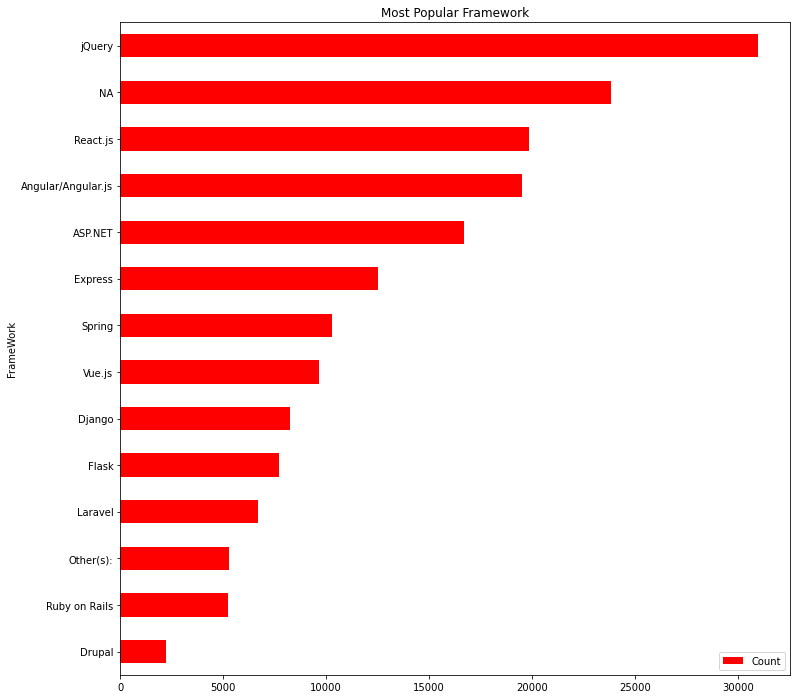

In [114]:
framework_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Most Popular Framework' , color = "r")

In [125]:
count_loc = df["WorkLoc"].value_counts()#Provide a pandas series of the counts for each WorkLoc
count_loc

Office                                            40592
Home                                              23278
Other place, such as a coworking space or cafe     6185
Name: WorkLoc, dtype: int64

Text(0.5, 1.0, 'Where would you prefer to work?')

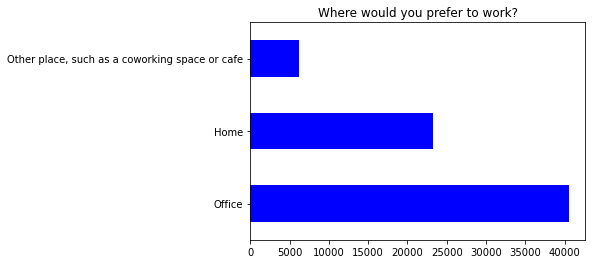

In [128]:
count_loc.plot(kind="barh" , color = "b" )

plt.title("Where would you prefer to work?")


In [138]:
Gender_counts = df["Gender"].value_counts()
Gender_counts

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [139]:
type(Gender_counts)

pandas.core.series.Series

In [141]:
Gender_counts.shape

(7,)